In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data
dataframe=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")


In [4]:
dataframe

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [6]:
#Data description
dataframe.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
dataframe.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
# for continuous variables
dataframe.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Checking for null values
dataframe.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [21]:
# No null values

In [23]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(dataframe)
print(numeric_columns)

print("===="*20)



# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(dataframe)
print("Categorical Features:")
print(categorical_columns)
# Function to check the datatypes of all the columns:
def check_datatypes(dataset):
    return dataset.dtypes


check_datatypes(dataframe)

   age  balance  day  duration  campaign  pdays  previous
0   56     1933   19        44         2     -1         0
1   31        3   20        91         2     -1         0
2   27      891   18       240         1     -1         0
3   57     3287   22       867         1     84         3
4   31      119    4       380         1     -1         0
Categorical Features:
          job   marital  education default housing loan    contact month  \
0      admin.   married    unknown      no      no   no  telephone   nov   
1     unknown   married  secondary      no      no   no   cellular   jul   
2    services   married  secondary      no     yes   no   cellular   jul   
3  management  divorced   tertiary      no      no   no   cellular   jun   
4  technician   married  secondary      no     yes   no   cellular   feb   

  poutcome subscribed  
0  unknown         no  
1  unknown         no  
2  unknown         no  
3  success        yes  
4  unknown         no  


age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [24]:
#Checking for missing data 
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    return missing_data
    
    
missing_data = missing_data(dataframe)
print(missing_data)


            Total  Percent
age             0      0.0
day             0      0.0
poutcome        0      0.0
previous        0      0.0
pdays           0      0.0
campaign        0      0.0
duration        0      0.0
month           0      0.0
contact         0      0.0
job             0      0.0
loan            0      0.0
housing         0      0.0
balance         0      0.0
default         0      0.0
education       0      0.0
marital         0      0.0
subscribed      0      0.0


In [25]:
# EDA & Data Visualizations

In [84]:
# Importing necessary library
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier 
from sklearn.linear_model import Ridge,Lasso

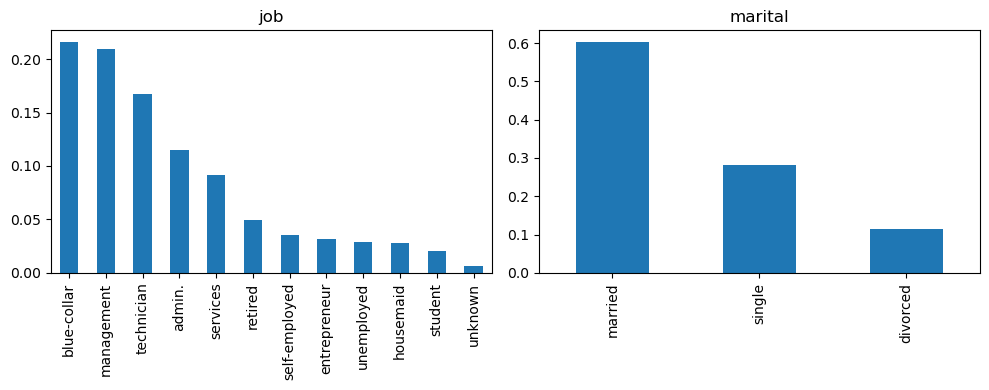

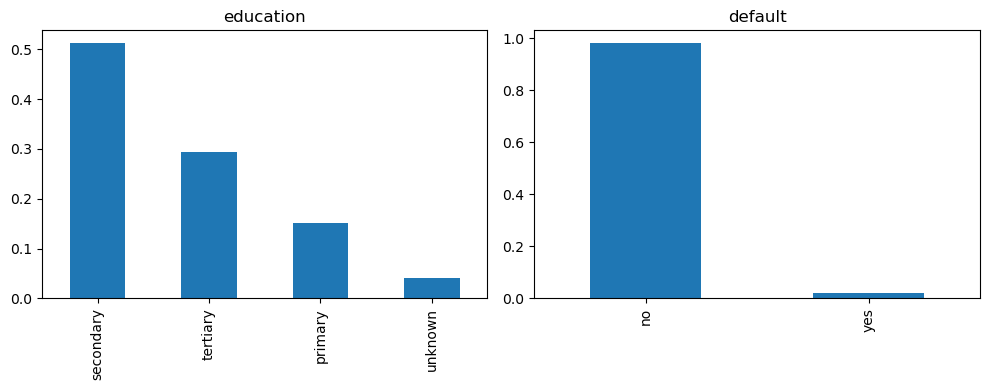

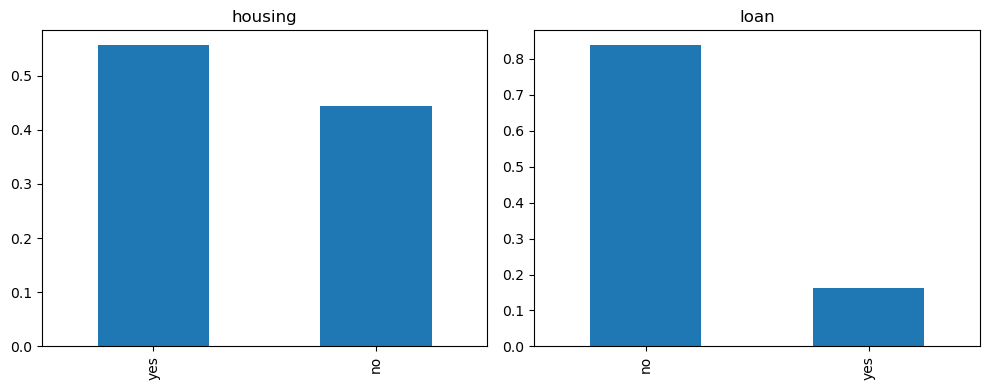

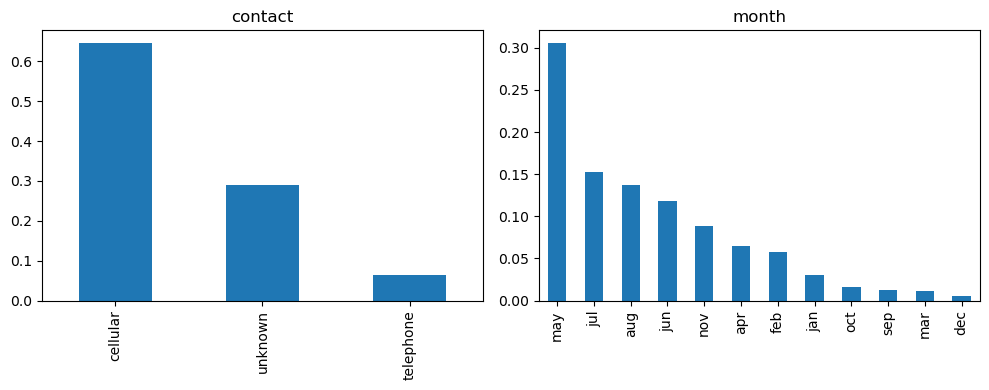

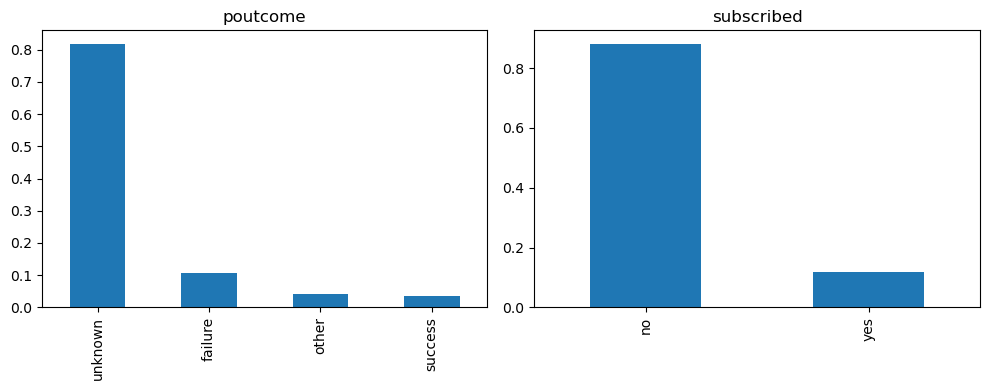

In [26]:
# Univariate analysis of Categorical columns
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts(normalize=True).plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
plot = plot_categorical_columns(dataframe)      

In [27]:
# Impute mising values of categorical data with mode
def impute_mode(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            dataframe[col]=dataframe[col].str.replace('unknown',dataframe[col].mode()[0])
    return dataframe

dataframe = impute_mode(dataframe)

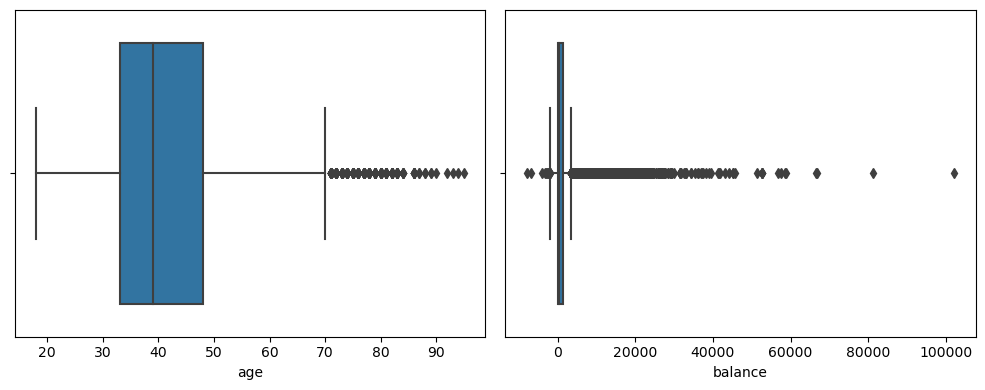

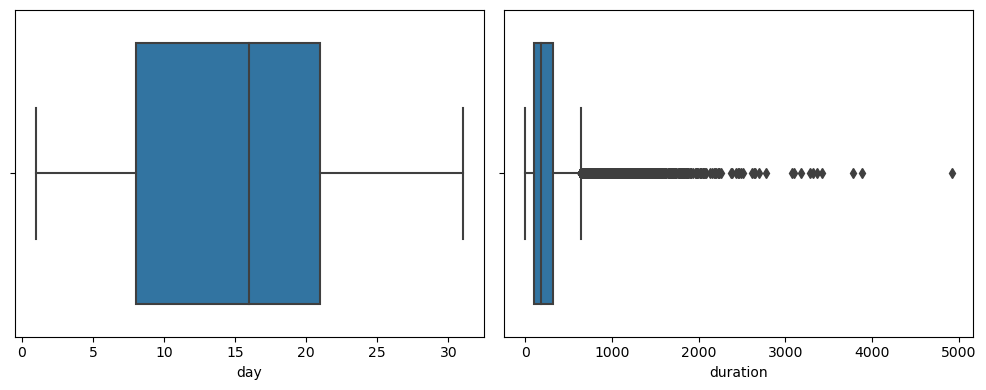

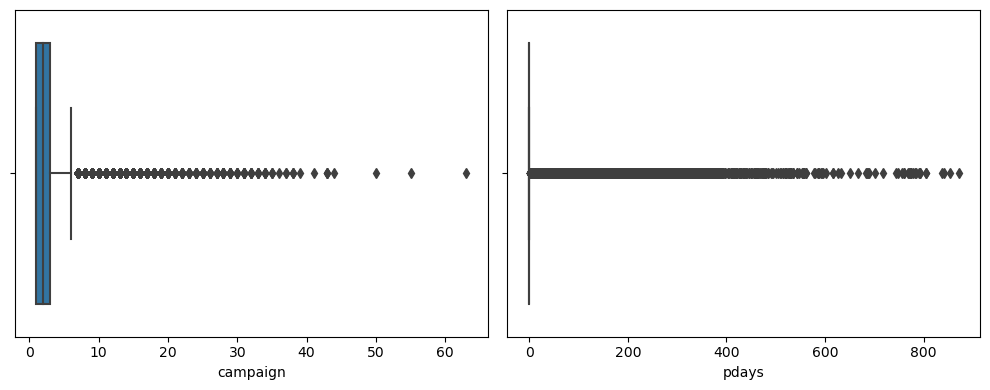

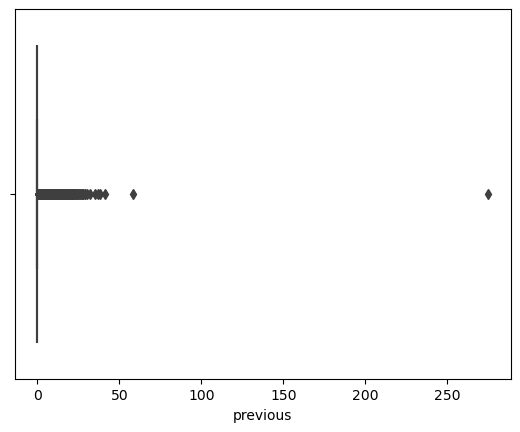

In [28]:
# Checking for outliers
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_box_plots(dataframe)

In [17]:
dataframe.head()
           

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [19]:
# Remove the Id column from the dataset
dataframe.drop('ID',axis=1,inplace=True)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


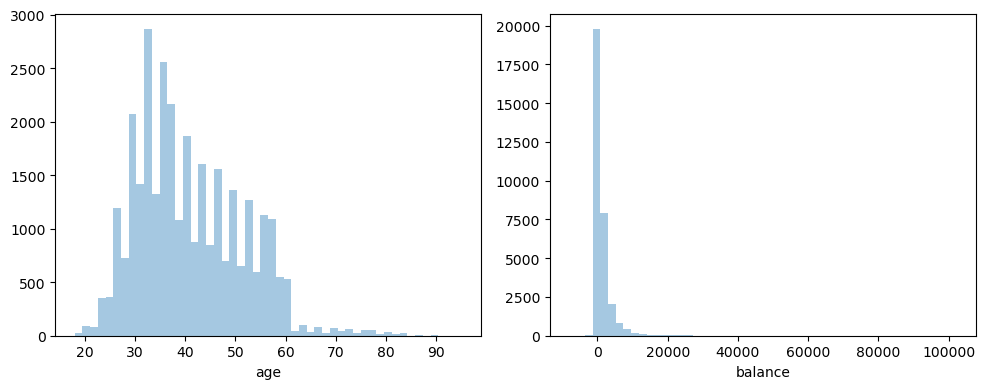

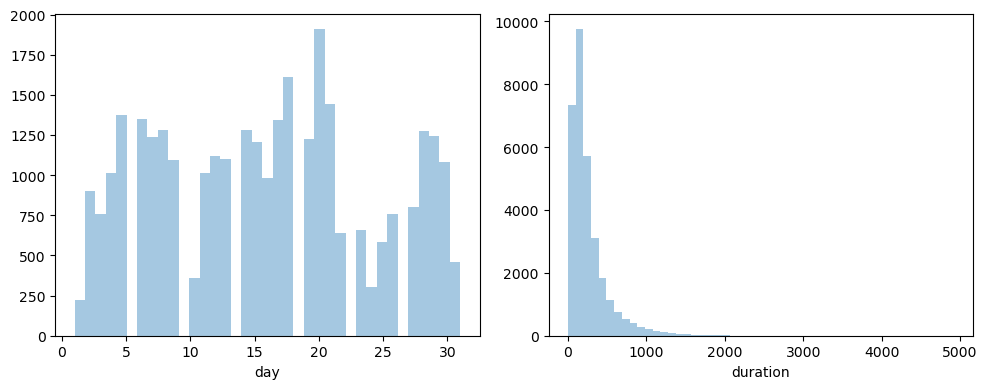

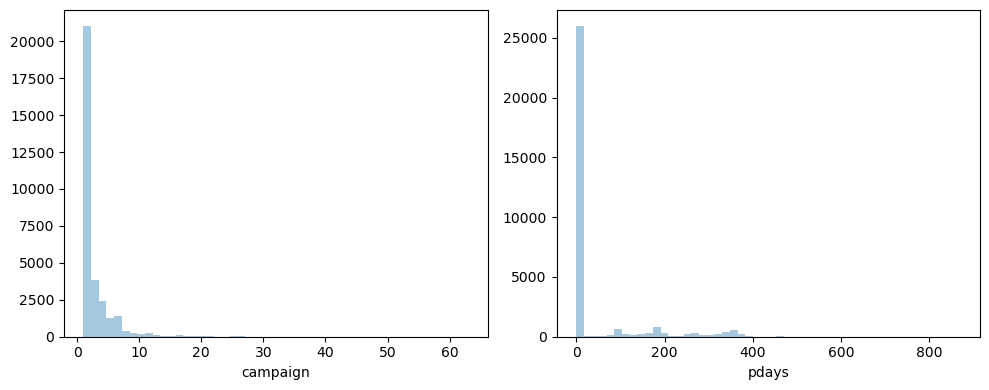

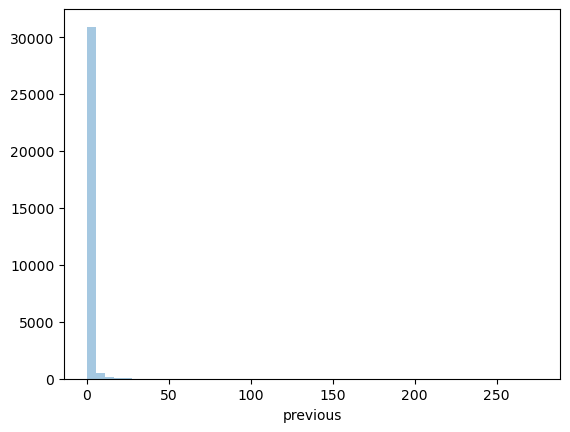

In [30]:
# Function to plot histograms
def plot_continuous_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            
plot_continuous_columns(dataframe)

In [31]:
# Dropping the columns pdays & previous
dataframe.drop(['pdays','previous'],1,inplace=True)

In [35]:
#Check for Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(dataframe['subscribed'])

no     88.261131
yes    11.738869
Name: subscribed, dtype: float64

In [39]:
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,unknown,no
1,31,blue-collar,married,secondary,no,3,no,no,cellular,20,jul,91,2,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,unknown,no


In [41]:
#Separating the data into dependent and independent variables.
dataframe_X =dataframe.drop('subscribed', axis = 1)
dataframe_X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,unknown
1,31,blue-collar,married,secondary,no,3,no,no,cellular,20,jul,91,2,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,unknown


In [42]:
dataframe_Y = dataframe['subscribed']
dataframe_Y.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

In [32]:
# Bivariate Analysis - Categorical Columns

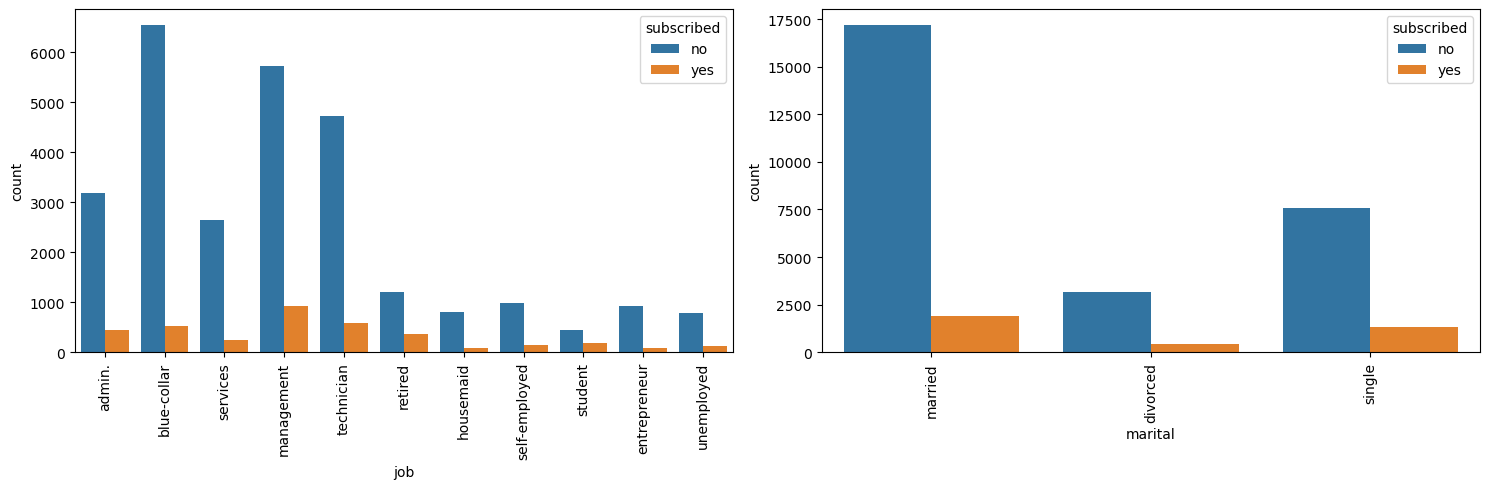

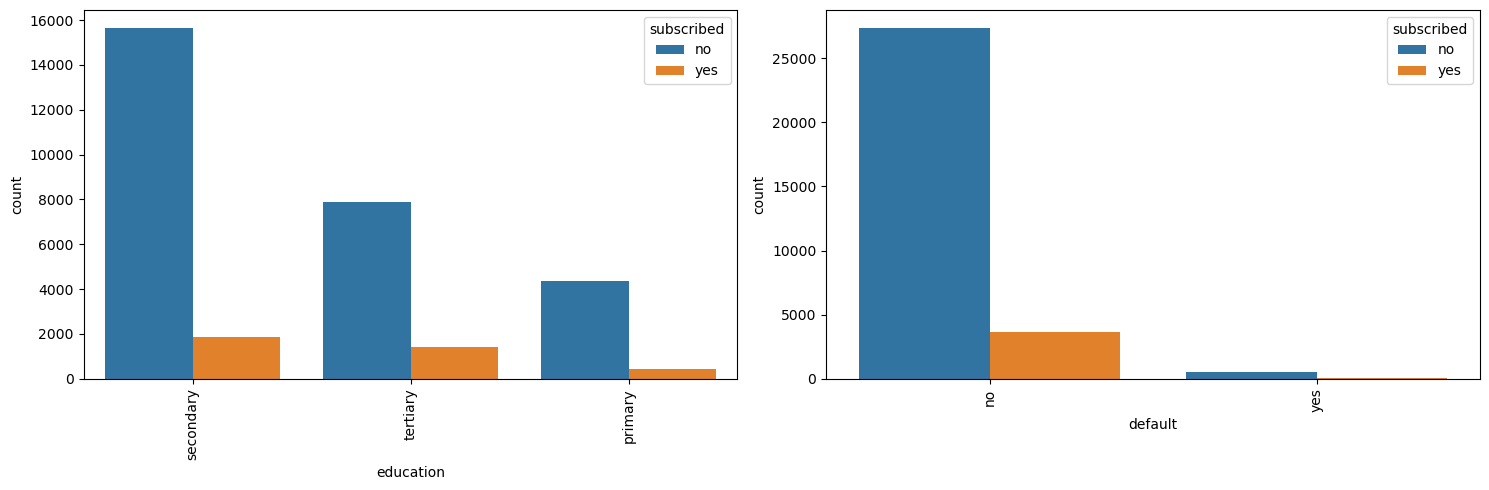

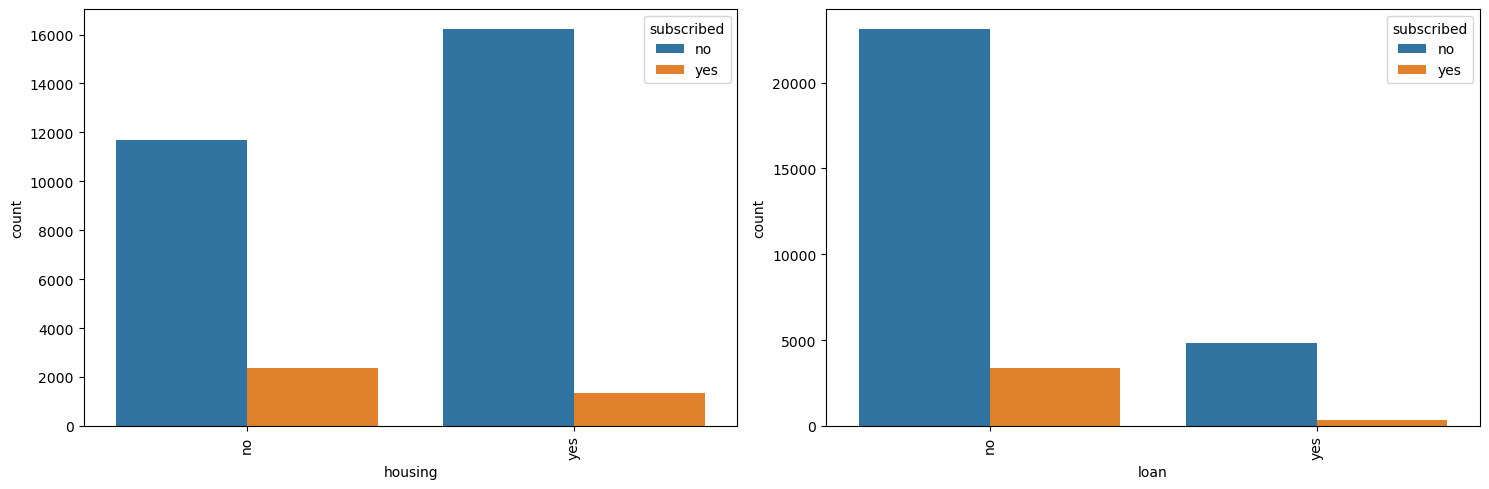

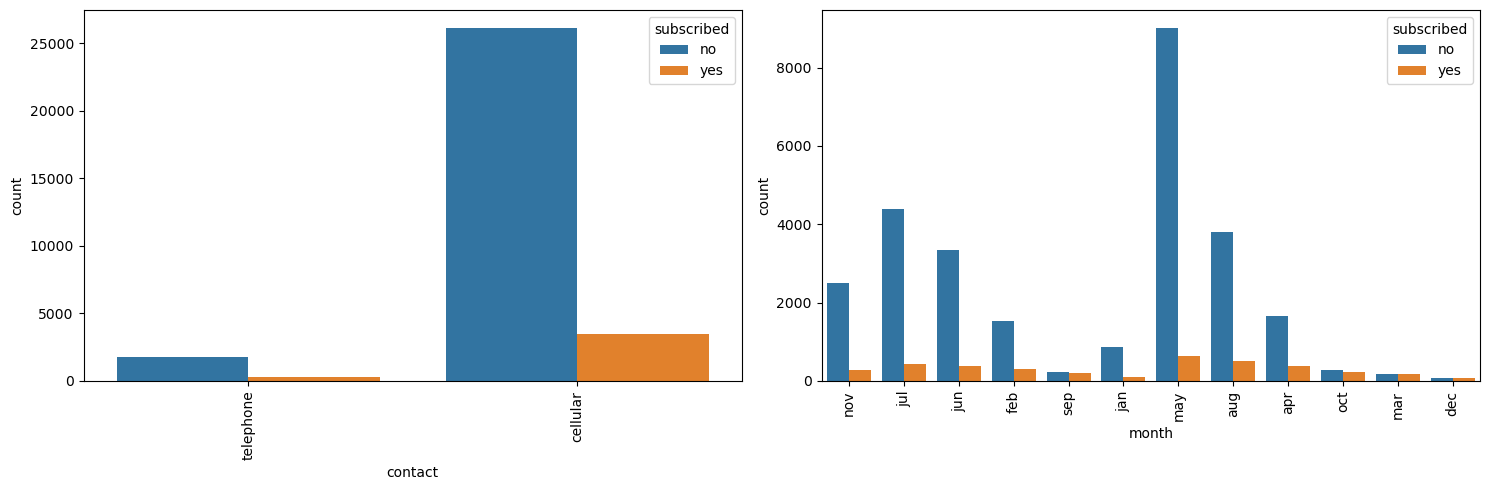

In [46]:
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = dataframe_X.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=dataframe[categorical_columns[i]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(dataframe[categorical_columns[i+1]],hue=target,data=dataframe)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(dataframe,dataframe['subscribed'])

In [47]:
#Treating outliers in the continuous columns
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


#dataframe = treat_outliers(dataframe)

# Checking for outliers after applying winsorization
#detect_outliers(dataframe)

In [50]:
# Function to Label Encode Categorical variables

In [53]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset

dataframe = dummyEncode(dataframe)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5599
           1       0.57      0.18      0.28       731

    accuracy                           0.89      6330
   macro avg       0.73      0.58      0.61      6330
weighted avg       0.86      0.89      0.86      6330

ROC_AUC_SCORE is 0.5818625028067109


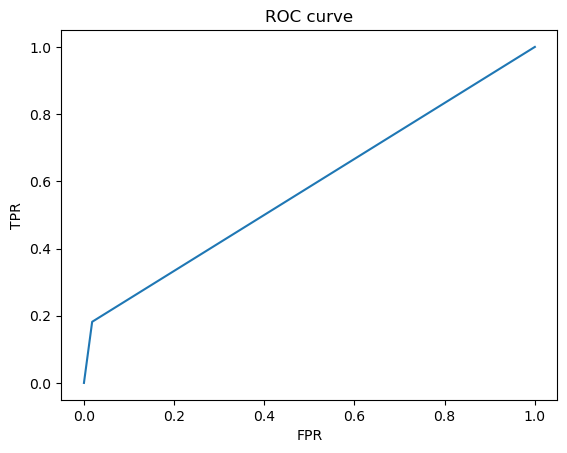

AUC Score = 58.19 %
On Model - 
Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5599
           1       0.39      0.44      0.42       731

    accuracy                           0.86      6330
   macro avg       0.66      0.68      0.67      6330
weighted avg       0.86      0.86      0.86      6330

ROC_AUC_SCORE is 0.6773794861257469


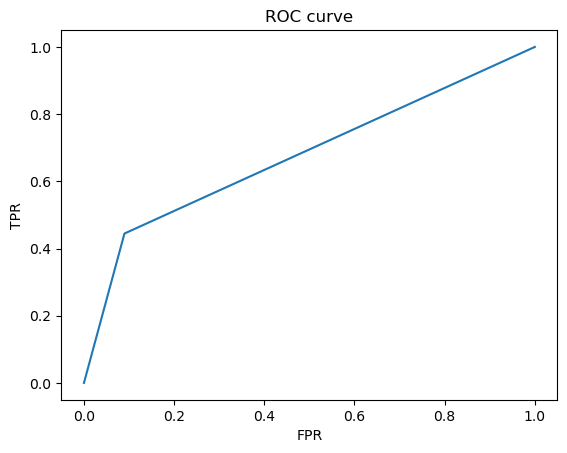

AUC Score = 67.74 %
On Model - 
Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.62      0.37      0.46       731

    accuracy                           0.90      6330
   macro avg       0.77      0.67      0.70      6330
weighted avg       0.89      0.90      0.89      6330

ROC_AUC_SCORE is 0.669854446844011


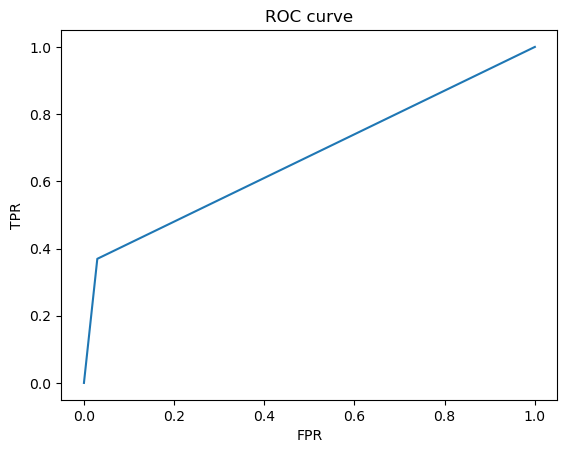

AUC Score = 66.99 %
On Model - 
Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5599
           1       0.61      0.45      0.52       731

    accuracy                           0.90      6330
   macro avg       0.77      0.71      0.73      6330
weighted avg       0.89      0.90      0.90      6330

ROC_AUC_SCORE is 0.7082435328372347


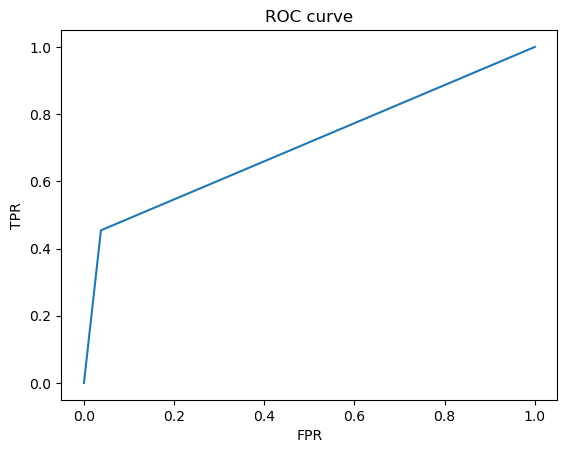

AUC Score = 70.82 %
On Model - 
XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5599
           1       0.60      0.37      0.45       731

    accuracy                           0.90      6330
   macro avg       0.76      0.67      0.70      6330
weighted avg       0.88      0.90      0.89      6330

ROC_AUC_SCORE is 0.6668201449887597


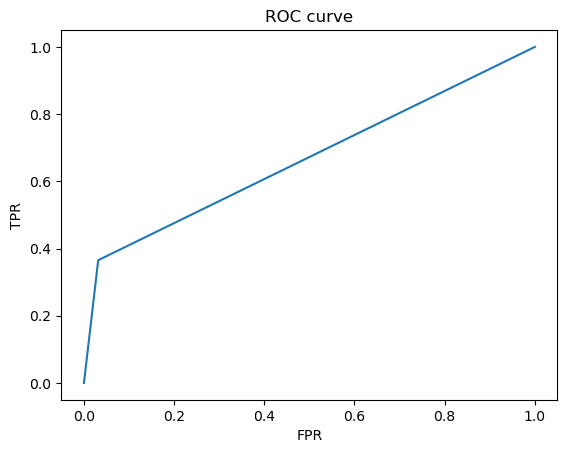

AUC Score = 66.68 %
On Model - 
Gradient Boosting


In [60]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

def run_model(predictors,target, model):
    '''
    Performs model training and tests using ROC-AUC 
    returns AUC score
    '''
    x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=42)
    model.fit(x_train, y_train)
    y_scores = model.predict(x_val)
    auc = roc_auc_score(y_val, y_scores)
    print('Classification Report:')
    print(classification_report(y_val,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return auc

# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Decision Tree':DecisionTreeClassifier,'Random Forest': RandomForestClassifier,'XGBoost':XGBClassifier,'Gradient Boosting':GradientBoostingClassifier}

for i in models.items():
    # run model
    model = i[1]()
    auc = run_model(X, y, model) # train and returns AUC test score
    print('AUC Score = %.2f' %(auc*100) +' %\nOn Model - \n'+str(i[0]))
    print('===='*20)
    

In [85]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [86]:
# Feature Selection-  Use feature selection methods for identifying the best set of features for each model.

In [99]:
# Use Recursive Feature Elimination for selecting the best features
def features_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier,'XGBoost':XGBClassifier}

# Selecting 5 number of features
for i in models.items():
    features_selection(X,y,5,i[1])

TypeError: __init__() takes 2 positional arguments but 3 were given

In [100]:
#Feature Selection using Random Forest

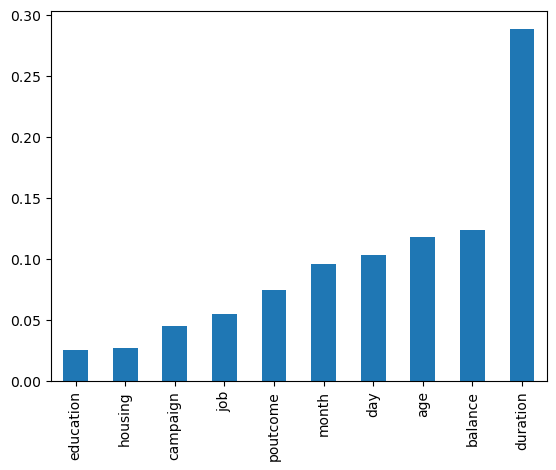

In [101]:
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(10)
    rfc_importances.plot(kind='bar')
    plt.show()

rfc_feature_selection(X,y)

In [102]:
# Grid-Search & Hyperparameter Tuning

In [104]:
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [105]:
# We have used the hyperparameters max_features, max_depth and criterion for this task.

In [106]:
#Applying the best parameters obtained using Grid Search on Random Forest model

On Validation data
ROC_AUC_SCORE is 0.7707674579767603
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      8385
           1       0.41      0.67      0.51      1110

    accuracy                           0.85      9495
   macro avg       0.68      0.77      0.71      9495
weighted avg       0.89      0.85      0.86      9495



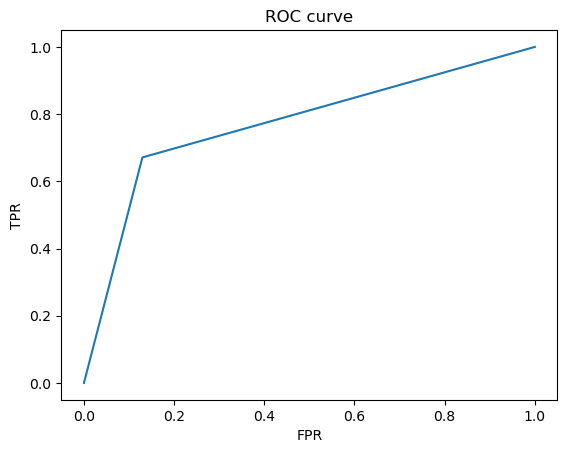

In [122]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


def grid_search_random_forrest_best(dataframe,target):
    
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
    oversample = SMOTE()
    X_sm,y_sm = oversample.fit_resample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation data')
    print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    



grid_search_random_forrest_best(X,y)
    

In [123]:
# Applying XGBoost model

On Validation Data
ROC_AUC_SCORE is  0.7854034714499831
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      8385
           1       0.47      0.67      0.55      1110

    accuracy                           0.87      9495
   macro avg       0.71      0.79      0.74      9495
weighted avg       0.90      0.87      0.88      9495

[[7551  834]
 [ 366  744]]


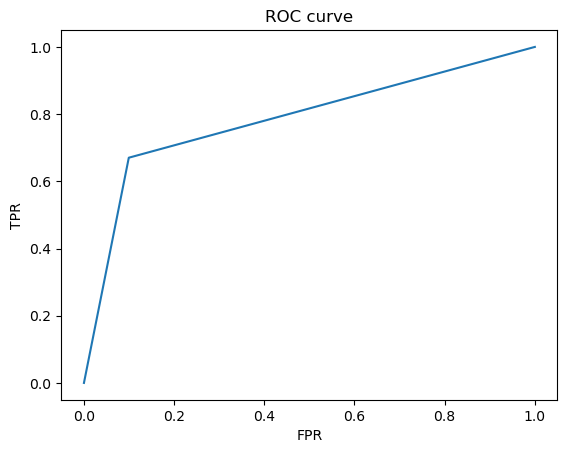

In [125]:
def xgboost(dataframe,target):
    X = dataframe
    y = target

    x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
    oversample = SMOTE()
    X_sm,y_sm = oversample.fit_resample(x_train, y_train)
  

    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(pd.DataFrame(X_sm,columns=x_train.columns), y_sm)
    y_pred = model.predict(x_val)
    
    print('On Validation Data')
    print('ROC_AUC_SCORE is ', roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    #     print(auc(false_positive_rate, true_positive_rate))
    
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    print(confusion_matrix(y_val,y_pred))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
xgboost(X,y)

In [126]:
# Ensembling

On Validation Data
AUC_ROC_SCORE is  0.7862302373930281
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      8385
           1       0.45      0.68      0.54      1110

    accuracy                           0.86      9495
   macro avg       0.70      0.79      0.73      9495
weighted avg       0.90      0.86      0.88      9495

[[7444  941]
 [ 350  760]]


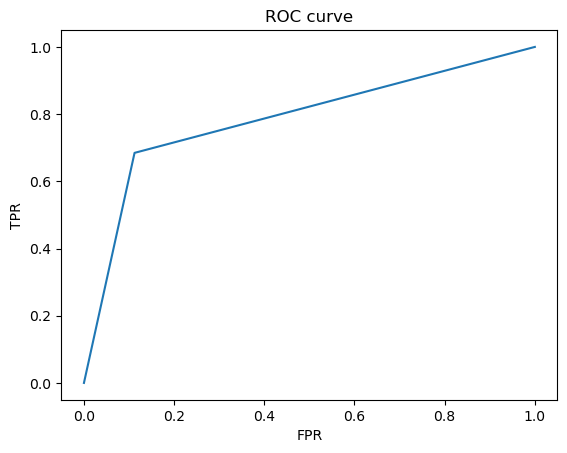

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
    oversample = SMOTE()
    X_sm,y_sm = oversample.fit_resample(x_train, y_train)
    
    
    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
    print('On Validation Data')
    print('AUC_ROC_SCORE is ',roc_auc_score(y_val, y_pred))
    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
ensemble_func2(X,y)

In [128]:
# Prediction on the test data

In [153]:
# Loading the data
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv ")
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [154]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [155]:
test.drop('ID',1,inplace=True)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [143]:
# Function to identify numeric features
def numeric_features(test):
    numeric_col = test.select_dtypes(include=np.number).columns.tolist()
    return test [numeric_col].head()
    
numeric_columns = numeric_features(test)
print(numeric_columns)

print("===="*20)



# Function to identify categorical features
def categorical_features(test):
    categorical_col = test.select_dtypes(exclude=np.number).columns.tolist()
    return test[categorical_col].head()

categorical_columns = categorical_features(test)
print("Categorical Features:")
print(categorical_columns)


# Function to check the datatypes of all the columns:
def check_datatypes(test):
    return test.dtypes


check_datatypes(test)

   age  balance  day  duration  campaign  pdays  previous
0   32      118   15        20         6     -1         0
1   78     2787    1       372         1     -1         0
2   31      144   16       676         1     -1         0
3   57     3777   13        65         2     -1         0
4   45     -705    3       111         1     -1         0
Categorical Features:
             job   marital  education default housing loan    contact month  \
0       services   married  secondary      no     yes   no   cellular   may   
1        retired  divorced    primary      no      no   no  telephone   jul   
2  self-employed    single   tertiary      no     yes   no    unknown   may   
3       services    single    primary      no     yes   no  telephone   may   
4    blue-collar  divorced  secondary      no      no  yes    unknown   jul   

  poutcome  
0  unknown  
1  unknown  
2  unknown  
3  unknown  
4  unknown  


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [146]:
# Function to identify the number of missing values in every feature
def missing_data(test):
    total = test.isnull().sum().sort_values(ascending=False)
    percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    return missing_data
    
    
missing_data = missing_data(dataframe)
print(missing_data)

            Total  Percent
age             0      0.0
job             0      0.0
marital         0      0.0
education       0      0.0
default         0      0.0
balance         0      0.0
housing         0      0.0
loan            0      0.0
contact         0      0.0
day             0      0.0
month           0      0.0
duration        0      0.0
campaign        0      0.0
poutcome        0      0.0
subscribed      0      0.0


In [147]:
# Impute mising values of categorical data with mode
def impute_mode(test):
    cols = list(test)
    for col in cols:
        if col in test.select_dtypes(exclude=np.number).columns:
            test[col]=test[col].str.replace('unknown',test[col].mode()[0])
    return test

test = impute_mode(test)

In [160]:
test.drop('pdays',1,inplace=True)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,0,3


In [161]:
test.drop('previous',1,inplace=True)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,3


In [162]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(test):
        
        columnsToEncode = list(test.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                test[feature] = le.fit_transform(test[feature])
            except:
                print('Error encoding '+feature)
        return test

test = dummyEncode(test)

In [163]:
#We then make a prediction on the preprocessed test data using the Grid Search Logisitic regression model.

In [165]:
def grid_search_log_reg(dataframe,target):


    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
    oversample = SMOTE()
    X_sm,y_sm = oversample.fit_resample(x_train, y_train)
    


    log_reg = LogisticRegression()

    param_grid = { 
        'C' : np.logspace(-5, 8, 18)
    }
    grid_search = GridSearchCV(log_reg, param_grid=param_grid)

    grid_search.fit(X_sm, y_sm)
    
    # Predict on the preprocessed test file
    y_pred = grid_search.predict(test)
    return y_pred

    
prediction = pd.DataFrame(grid_search_log_reg(X,y),columns=['y'])
